In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

# Agregar la carpeta raíz del proyecto al path
sys.path.append(os.path.dirname(os.getcwd()))

In [11]:
#1. Cargar el modelo de lightgbm
import joblib
import shap

model = joblib.load('../models/xgboost_model.joblib')
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=3, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=-1, num_parallel_tree=None, ...)

In [4]:
import pandas as pd
#2. Cargar los datos procesados
data = pd.read_csv('../temp/train_processed.csv')
data.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,...,genre_metal,genre_pop,genre_punk,genre_rock,genre_sad,genre_sertanejo,genre_singer-songwriter,genre_soul,genre_spanish,popularity
0,2.007112,-1.165213,-1.800002,0.346066,1.608067,-0.529908,-0.725737,-1.328626,-0.731499,-1.390867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64
1,0.149011,1.779020,0.276719,0.377340,-0.082059,1.229685,0.521173,0.752657,1.038678,0.626714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53
2,-0.874414,0.452947,0.344093,1.186891,-0.363746,-0.673052,1.016270,0.752657,-0.985310,-0.711406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40
3,-0.282607,-0.855601,-0.325689,0.959331,0.481317,2.054680,-0.271021,-1.328626,0.609513,2.325667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16
4,1.609166,-0.616090,-0.848832,0.468483,-0.645434,0.531916,-0.888429,0.752657,-1.040892,-0.855948,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


In [5]:
target_col = 'popularity'
X = data.drop(columns=[target_col])
y = data[target_col]

In [6]:
# 3. Crear el explicador SHAP
explainer = shap.TreeExplainer(model)

In [12]:
# 4. Calcular los valores SHAP
shap_values = explainer.shap_values(X)

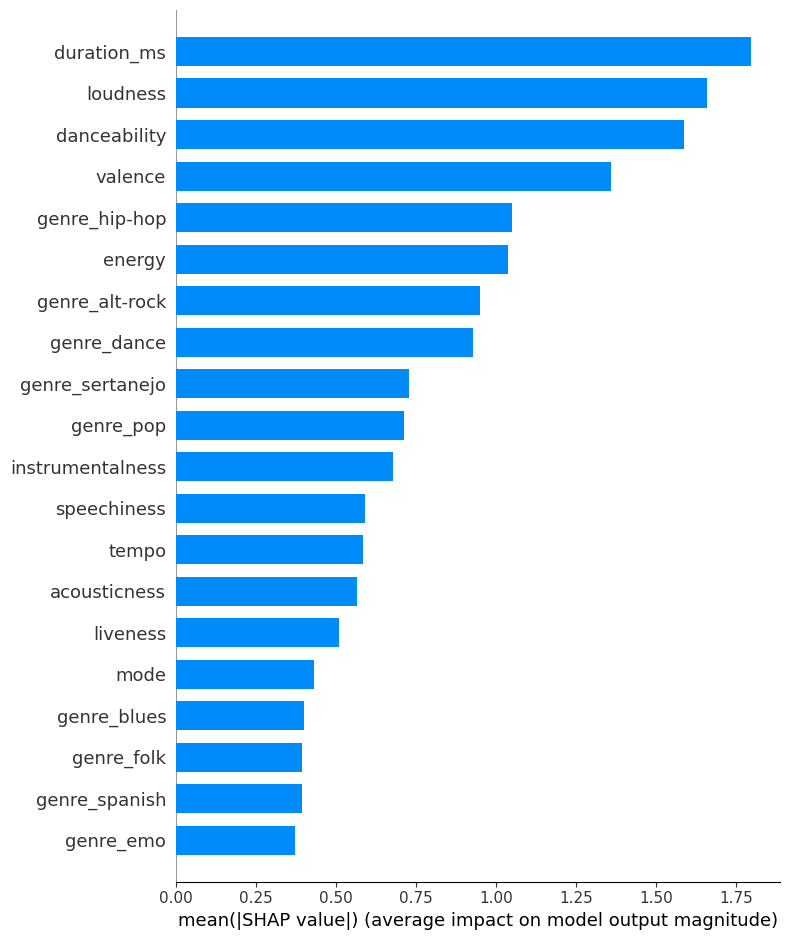

In [14]:
# Importancia global promedio de las features
shap.summary_plot(shap_values, X, plot_type="bar")


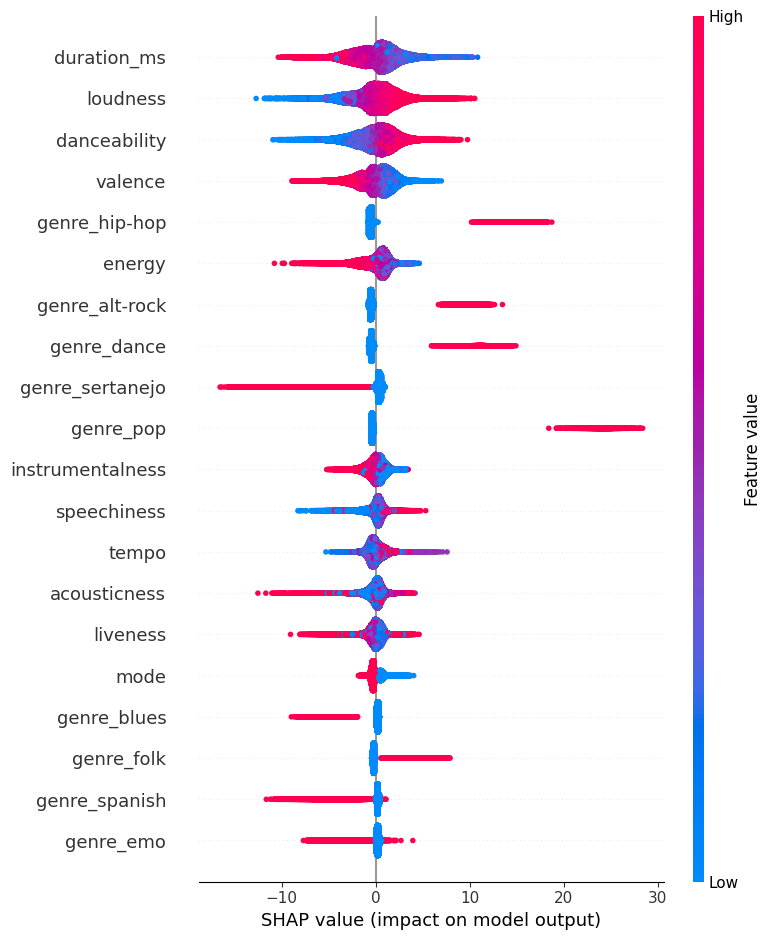

In [15]:
shap.summary_plot(shap_values, X)